# **Topik Modelling LDA**

## Read File

In [ ]:
import pandas as pd

url = "/content/drive/MyDrive/web mining/HasilPreposPTA.xlsx"
dt = pd.read_excel(url)
dt['cleaning']

0      sistem informasi akademik siakad sistem inform...
1      berjalannya koneksi jaringan komput lancar gan...
2      web server perangkat lunak server berfungsi me...
3      penjadwalan kuliah perguruan komplek permasala...
4      seir perkembangan teknolog didunia muncul tekn...
                             ...                        
853    investasi saham memiliki resiko kerugian perge...
854    inform retriev ir pengambilan informasi tersim...
855    klasifikasi citra prose pengelompokan piksel c...
856    identifikasi atribut pejalan kaki salah peneli...
857    topik deteksi objek menarik perhatian perkemba...
Name: cleaning, Length: 858, dtype: object

## Eksplorasi analisis (Word Cloud)

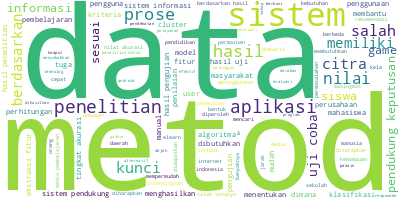

In [ ]:
from wordcloud import WordCloud

long_string = ','.join(list(dt['cleaning'].astype(str).values))

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)

# Visualisasi WordCloud
wordcloud.to_image()

## Proporsi Topik Dalam Dokumen

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

data = dt['cleaning']

# Membuat DataFrame dari data teks
dt_lda = pd.DataFrame(data)

dt_lda['cleaning'] = dt_lda['cleaning'].fillna('')

# mengonversi teks menjadi matriks hitungan
vectorizer = CountVectorizer()
count_matrix = vectorizer.fit_transform(dt_lda['cleaning'])

# model LDA
k = 3
alpha = 0.1
beta = 0.2

lda = LatentDirichletAllocation(n_components=k, doc_topic_prior=alpha, topic_word_prior=beta, random_state=42)
lda.fit(count_matrix)

# distribusi topik pada setiap dokumen
doc_topic_distribution = lda.transform(count_matrix)

topic_names = [f"Topik {i+1}" for i in range(k)]
df = pd.DataFrame(columns=['Abstrak'] + topic_names)

for i, topic_name in enumerate(topic_names):
    df[topic_name] = doc_topic_distribution[:, i]

# Menampilkan DataFrame
df['Abstrak'] = dt_lda['cleaning'].values

# Menambahkan kolom berisikan jumlah total proporsi semua topik
df['Total Proporsi Topik'] = df[topic_names].sum(axis=1)

# Menyimpan DataFrame sebagai file CSV
output_csv_file = "topik_in_document.csv"
df.to_csv(output_csv_file, index=False)

In [ ]:
df

,Abstrak,Topik 1,Topik 2,Topik 3,Total Proporsi Topik
0,sistem informasi akademik siakad sistem inform...,0.001215,0.001215,0.997569,1.0
1,berjalannya koneksi jaringan komput lancar gan...,0.000950,0.000950,0.998100,1.0
2,web server perangkat lunak server berfungsi me...,0.320577,0.056240,0.623182,1.0
3,penjadwalan kuliah perguruan komplek permasala...,0.997027,0.001486,0.001486,1.0
4,seir perkembangan teknolog didunia muncul tekn...,0.597672,0.001201,0.401127,1.0
...,...,...,...,...,...
853,investasi saham memiliki resiko kerugian perge...,0.511188,0.219065,0.269747,1.0
854,inform retriev ir pengambilan informasi tersim...,0.275245,0.723524,0.001230,1.0
855,klasifikasi citra prose pengelompokan piksel c...,0.000636,0.998728,0.000636,1.0
856,identifikasi atribut pejalan kaki salah peneli...,0.000773,0.998453,0.000774,1.0


## Proporsi Kata Dalam Topik

In [ ]:
# Menampilkan distribusi kata pada setiap topik
topic_word_distribution = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]

# Membuat DataFrame untuk distribusi kata pada setiap topik
word_topic_df = pd.DataFrame(topic_word_distribution.T, columns=[f"Topik {i+1}" for i in range(k)],
                             index=vectorizer.get_feature_names_out())

# Normalisasi distribusi kata pada setiap topik agar totalnya 1.0
word_topic_df = word_topic_df.div(word_topic_df.sum(axis=1), axis=0)

# Menambahkan kolom berisikan jumlah total proporsi semua kata pada topik
word_topic_df['Total Proporsi Kata'] = word_topic_df.sum(axis=1)

# Menyimpan DataFrame yang telah diperbarui sebagai file CSV
output_csv_file = "kata_in_topik.csv"
word_topic_df.to_csv(output_csv_file)


In [ ]:
# Menampilkan DataFrame sebagai tabel
print("\nProporsi Kata pada Setiap Topik:")
word_topic_df


Proporsi Kata pada Setiap Topik:


,Topik 1,Topik 2,Topik 3,Total Proporsi Kata
aalysi,0.122721,0.134022,0.743257,1.0
aam,0.077695,0.848917,0.073388,1.0
ab,0.742164,0.132583,0.125253,1.0
abad,0.456362,0.081526,0.462112,1.0
abadi,0.075698,0.081137,0.843165,1.0
...,...,...,...,...
zucara,0.740580,0.132580,0.126839,1.0
zungu,0.740580,0.132580,0.126839,1.0
zâ,0.131580,0.846214,0.022206,1.0
âµ,0.055303,0.891842,0.052855,1.0
